In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data=np.load("pressures.npy")
print(data.shape)
col1=data[:,0][0]
col2_x=data[:,1][0]
col2=data[:,0][1]
col2_x=data[:,1][1]
col3=data[:,0][2]
col3_x=data[:,1][2]
col4=data[:,0][3]
col4_x=data[:,1][3]
col5=data[:,0][4]
col5_x=data[:,1][4]

def range_(col):
    return np.round(np.max(col)-np.min(col),2)

print("average",np.round(np.average(col1),2),"&",np.round(np.average(col2),2),"&",np.round(np.average(col3),2),"&",np.round(np.average(col4),2),"&",np.round(np.average(col5),2))
print("median",np.round(np.median(col1),2),"&",np.round(np.median(col2),2),"&",np.round(np.median(col3),2),"&",np.round(np.median(col4),2),"&",np.round(np.median(col5),2))
print("range",np.round(range_(col1),2),"&",np.round(range_(col2),2),"&",np.round(range_(col3),2),"&",np.round(range_(col4),2),"&",np.round(range_(col5),2))
print("std",np.round(np.std(col1),2),"&",np.round(np.std(col2),2),"&",np.round(np.std(col3),2),"&",np.round(np.std(col4),2),"&",np.round(np.std(col5),2))

(30, 2, 5)
average 53.89 & 42.9 & 45.69 & 0.0 & 0.0
median 61.29 & 40.46 & 40.07 & 0.0 & 0.0
range 39.13 & 35.85 & 40.44 & 0.0 & 0.0
std 16.89 & 11.74 & 14.87 & 0.0 & 0.0


In [59]:
log=np.load("errorlog.npy")
print(log)

[[89.  1.]
 [94.  1.]
 [92.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


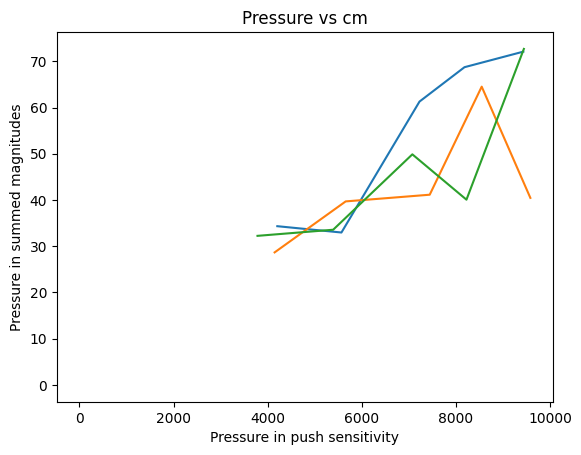

In [61]:
CM=1
ST=0.2
for i in range(len(data)):
    plt.plot(data[:,1][i],data[:,0][i])

plt.xlabel("Pressure in push sensitivity")
plt.ylabel("Pressure in summed magnitudes")
plt.title("Pressure vs magnitude")
plt.show()
